## 1. Introduction

The purpose of this homework is to solve a classification problem proposed as a competition in the Kaggle InClass platform, where each team of two members will try to get the maximum score. You can apply any of the concepts and techniques studied in class for exploratory data analysis, feature selection and classification.

## 2. Problem description

#### Context:
Traditionally, the design of a cellular network focuses on the optimization of energy and resources that guarantees a smooth operation even during peak hours (i.e. periods with higher traffic load). However, this implies that cells are most of the time overprovisioned of radio resources. Next generation cellular networks ask for a dynamic management and configuration in order to adapt to the varying user demands in the most efficient way with regards to energy savings and utilization of frequency resources. If the network operator were capable of anticipating to those variations in the users’ traffic demands, a more efficient management of the scarce (and expensive) network resources would be possible.
Current research in mobile networks looks upon Machine Learning (ML) techniques to help manage those resources. In this case, you will explore the possibilities of ML to detect abnormal behaviors in the utilization of the network that would motivate a change in the configuration of the base station.

#### Goal:
The objective of the network optimization team is to analyze traces of past activity, which will be used to train an ML system capable of classifying samples of current activity as:
- 0 (normal): current activity corresponds to normal behavior of any working day and. Therefore, no re-configuration or redistribution of resources is needed.

- 1 (unusual): current activity slightly differs from the behavior usually observed for that time of the day (e.g. due to a strike, demonstration, sports event, etc.), which should trigger a reconfiguration of the base station.

#### Content:
The dataset has been obtained from a real LTE deployment. During two weeks, different metrics were gathered from a set of 10 base stations, each having a different number of cells, every 15 minutes. The dataset is provided in the form of a csv file, where each row corresponds to a sample obtained from one particular cell at a certain time. Each data example contains the following features:

- Time : hour of the day (in the format hh:mm) when the sample was generated.
- CellName1: text string used to uniquely identify the cell that generated the current sample. CellName is in the form xaLTE, where x identifies the base station, and a the cell within that base station (see the example in the right figure).
- PRBUsageUL and PRBUsageDL: level of resource utilization in that cell measured as the portion of Physical Radio Blocks (PRB) that were in use (%) in the previous 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
- meanThrDL and meanThrUL: average carried traffic (in Mbps) during the past 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
- maxThrDL and maxThrUL: maximum carried traffic (in Mbps) measured in the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
- meanUEDL and meanUEUL: average number of user equipment (UE) devices that were simultaneously active during the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
- maxUEDL and maxUEUL: maximum number of user equipment (UE) devices that were simultaneously active during the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.
- maxUE_UL+DL: maximum number of user equipment (UE) devices that were active simultaneously in the last 15 minutes, regardless of UL and DL.

- Unusual: labels for supervised learning. A value of 0 determines that the sample corresponds to normal operation, a value of 1 identifies unusual behavior.

# Import Iib

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Read Dataset

In [2]:
df = pd.read_csv('dataset.csv',encoding= 'unicode_escape')
df.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7,1
1,9:45,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10,1
2,7:45,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2,1
3,2:45,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4,1
4,3:30,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3,0


# Statistical View

In [3]:
df.describe()

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,Unusual
count,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36815.000000,36815.000000,36904.000000
mean,7.835090,2.106396,0.560525,0.067610,17.764369,1.791974,1.173441,0.665143,4.190819,3.063371,0.275932
std,8.428206,2.247514,0.727623,0.186555,15.739932,5.028928,0.214065,0.535493,1.772484,1.387446,0.446989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.213000,0.707000,0.140000,0.021000,5.710750,0.362000,1.041000,0.010000,3.000000,2.000000,0.000000
50%,4.547000,1.314000,0.352000,0.040000,14.170000,0.703000,1.112000,1.011000,4.000000,3.000000,0.000000
75%,12.126000,2.728000,0.718000,0.075000,25.059500,1.242000,1.263000,1.051000,5.000000,4.000000,1.000000
max,51.333000,77.505000,19.601000,12.461000,140.008000,48.253000,2.915000,2.668000,12.000000,12.000000,1.000000


In [4]:
print(df['CellName'].unique())
print("##############################################################")
print("Number of Cells : {} ".format(len(df['CellName'].unique())))

['3BLTE' '1BLTE' '9BLTE' '4ALTE' '10BLTE' '9ALTE' '4BLTE' '4CLTE' '6CLTE'
 '5CLTE' '7BLTE' '8CLTE' '7ULTE' '6WLTE' '7VLTE' '7WLTE' '5ALTE' '6ALTE'
 '6ULTE' '3CLTE' '5BLTE' '8ALTE' '8BLTE' '6BLTE' '10CLTE' '7CLTE' '3ALTE'
 '1CLTE' '2ALTE' '10ALTE' '1ALTE' '6VLTE' '7ALTE']
##############################################################
Number of Cells : 33 


<AxesSubplot:>

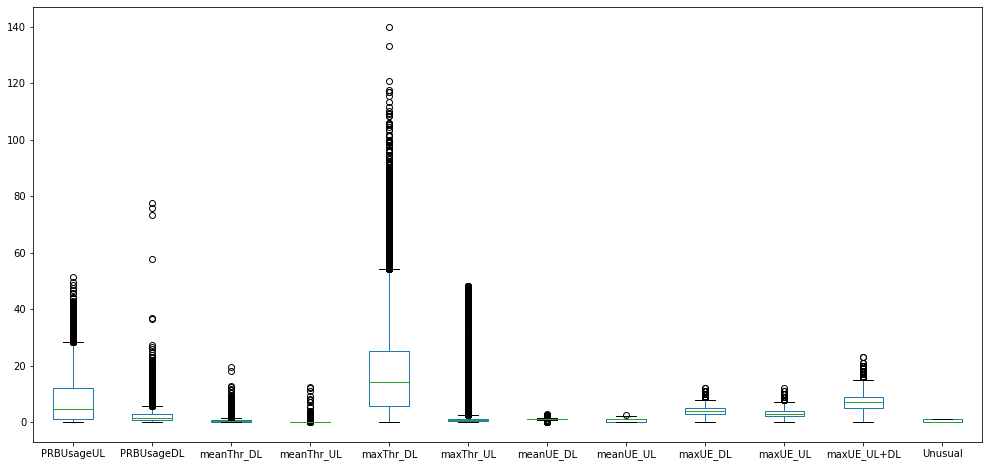

In [76]:
df.plot.box(figsize=(17,8))

<AxesSubplot:>

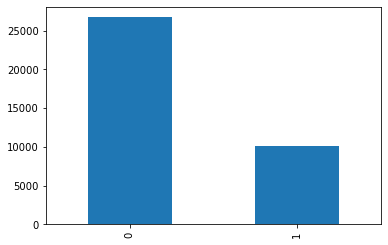

In [5]:
df['Unusual'].value_counts().plot.bar()

# Missing Data

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
maxUE_UL,89,0.002412
maxUE_DL,89,0.002412
maxUE_UL+DL,5,0.000135
Unusual,0,0.000000
meanUE_UL,0,0.000000
meanUE_DL,0,0.000000
maxThr_UL,0,0.000000
maxThr_DL,0,0.000000
meanThr_UL,0,0.000000
meanThr_DL,0,0.000000


# Fill Blank values with mean 

In [7]:
df["maxUE_UL"].fillna(3, inplace = True)
df["maxUE_DL"].fillna(4, inplace = True)

In [8]:
df["maxUE_UL+DL"]=df["maxUE_UL"]+df["maxUE_DL"]

In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
Unusual,0,0.0
maxUE_UL+DL,0,0.0
maxUE_UL,0,0.0
maxUE_DL,0,0.0
meanUE_UL,0,0.0
meanUE_DL,0,0.0
maxThr_UL,0,0.0
maxThr_DL,0,0.0
meanThr_UL,0,0.0
meanThr_DL,0,0.0


# Correlation

Text(0.5, 1.0, 'dataset correlation')

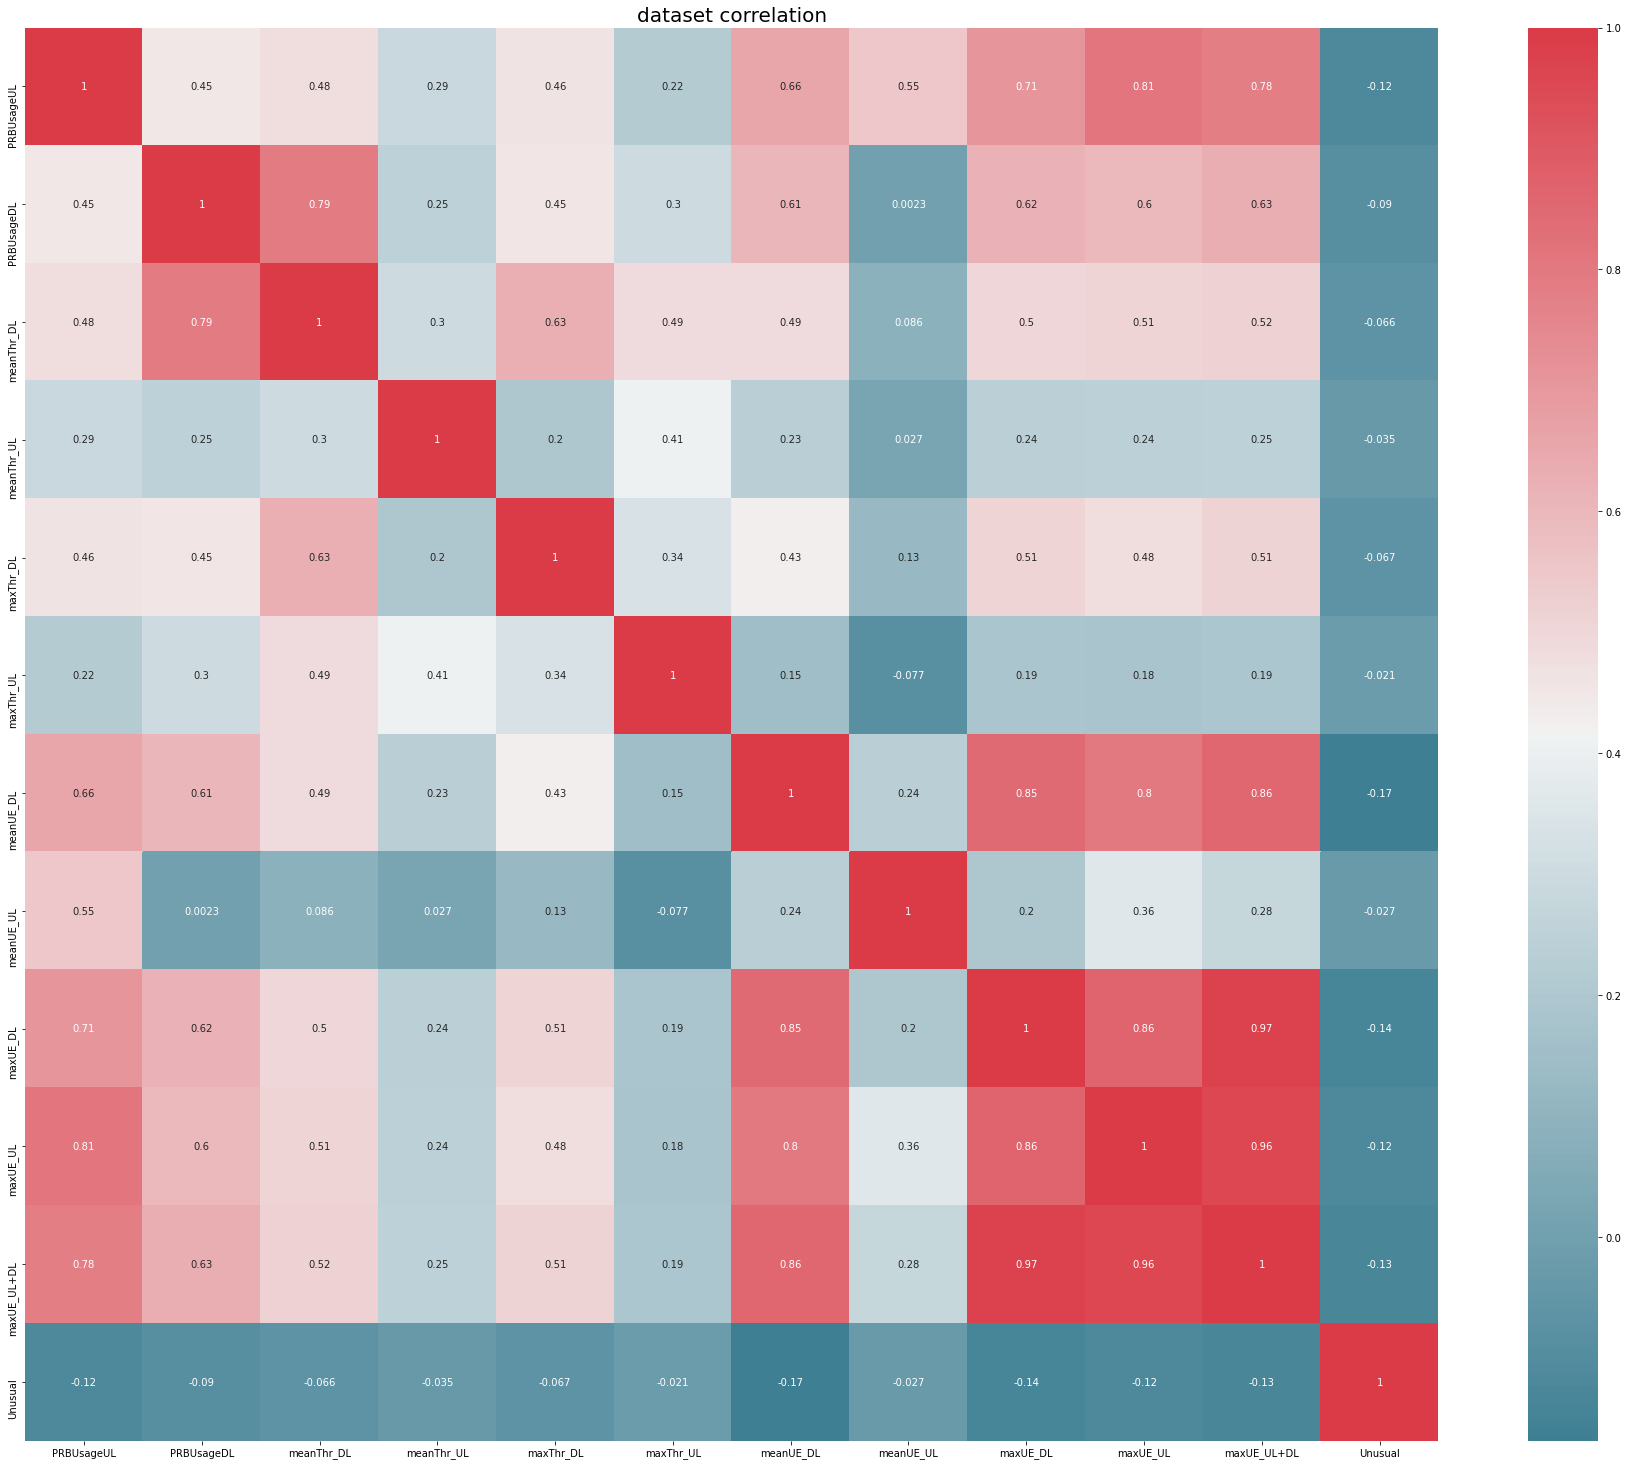

In [10]:
f, ax = plt.subplots(figsize=(32, 26))
corr = df.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

In [11]:
final_df=df.drop(["maxUE_UL+DL","CellName"], axis=1)

# Data Clean

In [12]:
final_df['Time/Hour']=pd.to_datetime(final_df["Time"], format = '%H:%M', errors = 'coerce').dt.hour
final_df['Time/Min']=pd.to_datetime(final_df["Time"], format = '%H:%M', errors = 'coerce').dt.minute

# Spliting Data

In [13]:
X = final_df.drop(["Unusual","Time"], axis=1)

In [14]:
y = final_df["Unusual"]

# SMOTE

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_res, y_res = sm.fit_sample(X, y)
unique, count = np.unique(y_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 26721, 1: 26721}

# StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#feature scaling independent variables
X_res = sc.fit_transform(X_res)
X_res

array([[ 0.54445869, -0.28214319, -0.23482598, ...,  0.01882942,
        -0.18795944,  1.3432875 ],
       [ 1.82042128, -0.04465297,  0.00869088, ...,  0.781554  ,
        -0.33339899,  1.3432875 ],
       [-0.85659827, -0.75664672, -0.75248159, ..., -1.50661974,
        -0.6242781 ,  1.3432875 ],
       ...,
       [ 0.9272357 , -0.01556797,  0.15631276, ...,  0.57018   ,
        -0.04251988, -1.33339723],
       [ 0.31713112,  1.75577699,  1.35289957, ...,  0.781554  ,
        -0.18795944,  1.3432875 ],
       [-0.25344246, -0.4597322 , -0.16246433, ..., -0.67039014,
         0.10291967,  1.3432875 ]])

# Splitting traning and test set

In [17]:
from sklearn.model_selection import train_test_split
# Get 80% of the data for training; the remaining 20% will be for validation and test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)

print(f"Length of train_features is: {X_train.shape}")
print(f"Length of train_labels is: {y_train.shape}")
print(f"Length of test_features is: {X_test.shape}")
print(f"Length of test_labels is: {y_test.shape}")

Length of train_features is: (42753, 12)
Length of train_labels is: (42753,)
Length of test_features is: (10689, 12)
Length of test_labels is: (10689,)


# XGB

In [18]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

[10:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Model Results

In [19]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

## Calculate Accuracy Test Set

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_test)

0.9917672373468052

## Calculate Accuracy Train Set

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred_train)

0.9961406217107571

# F1-Score

In [24]:
from sklearn.metrics import f1_score, precision_score, recall_score
print("F1-Score : {} ".format(f1_score(y_test, y_pred_test, average="macro")))
print("Precision : {} ".format(precision_score(y_test, y_pred_test, average="macro")))
print("Recall : {} " .format(recall_score(y_test, y_pred_test, average="macro")))

F1-Score : 0.9917670643361991 
Precision : 0.9917742795928166 
Recall : 0.9918265897775257 


# Learning Curves

[10:36:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:36:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:36:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:36:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:36:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:36:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:36:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

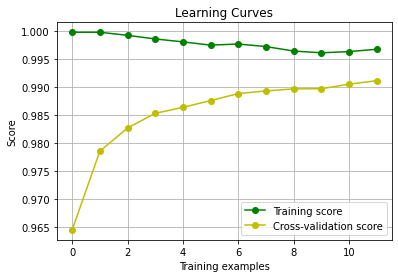

In [25]:
from sklearn.model_selection import learning_curve

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_scores_mean, 'o-', color="g",label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
draw_learning_curves(X_train, y_train, model, 12)

[10:37:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

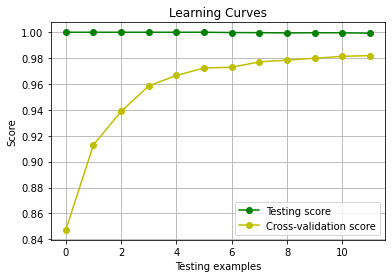

In [26]:
def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.title("Learning Curves")
    plt.xlabel("Testing examples")
    plt.ylabel("Score")
    plt.plot(train_scores_mean, 'o-', color="g",label="Testing score")
    plt.plot(test_scores_mean, 'o-', color="y",label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
draw_learning_curves(X_test, y_test, model, 12)